## Step 1: Background Information

With growing demands and cut-throat competition in the market, Superstore is seeking your knowledge to understand what works best for them. They would like to understand which products, regions, categories, and customer segments they should target or avoid.

**Key questions to answer from exploratory data analysis (EDA):**
1. What are the sales trends over time?
2. How do sales and profit vary across categories, regions, and customer segments?
3. Which profitable and unprofitable products should Superstore keep or remove from its portfolio?

## Step 2: Data Exploration and Cleaning

*Importing required libraries:*

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import json
import warnings

*Loading the Dataset:*

In [23]:
superstore_data = pd.read_csv('/Users/uyentran/Desktop/Superstore/Data/Superstore dataset.csv', encoding='ISO-8859-1')
superstore_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


*Checking data types and missing values:*

In [24]:
superstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

*Getting basic statistics for numeric columns:*

In [25]:
superstore_data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


*Checking for number of duplicate rows:*

In [26]:
no_of_duplicates = superstore_data.duplicated().sum()
print(f"Number of duplicates: {no_of_duplicates}")

Number of duplicates: 0


*Converting 'Order Date' and 'Ship Date' columns to datetime:*

In [27]:
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])
superstore_data['Ship Date'] = pd.to_datetime(superstore_data['Ship Date'])
superstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

*Checking the unique types/ names of shipping modes, countries, regions, and categories, as well as the number of states, cities, sub-categories, and products in the dataset:*

In [28]:
print("Shipping Modes: ")
print(superstore_data['Ship Mode'].unique())
print("Countries: ")
print(superstore_data['Country'].unique())
print('Number of States: ' + str(superstore_data['State'].unique().shape[0]))
print("Regions: ")
print(superstore_data['Region'].unique())
print('Number of Cities: ' + str(superstore_data['City'].unique().shape[0]))
print("Categories: ")
print(superstore_data['Category'].unique())
print("Number of Sub-categories: " + str(superstore_data['Sub-Category'].unique().shape[0]))
print("Number of Products: " + str(superstore_data['Product ID'].unique().shape[0]))

Shipping Modes: 
['Second Class' 'Standard Class' 'First Class' 'Same Day']
Countries: 
['United States']
Number of States: 49
Regions: 
['South' 'West' 'Central' 'East']
Number of Cities: 531
Categories: 
['Furniture' 'Office Supplies' 'Technology']
Number of Sub-categories: 17
Number of Products: 1862


*Creating new columns for data analysis: 'Order Month and ‘Order Year’:*

In [29]:
superstore_data['Order Month'] = superstore_data['Order Date'].dt.month 
superstore_data['Order Year'] = superstore_data['Order Date'].dt.year
superstore_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015


*Saving the cleaned dataset to a new CSV file:*

In [30]:
superstore_data.to_csv('/Users/uyentran/Desktop/Superstore/Data/cleaned_superstore_data.csv', index=False)

## Step 3: Data Analysis

### 3.1 Sales Trend Analysis

*Analyzing Sales Trends by Month and Order Year:*

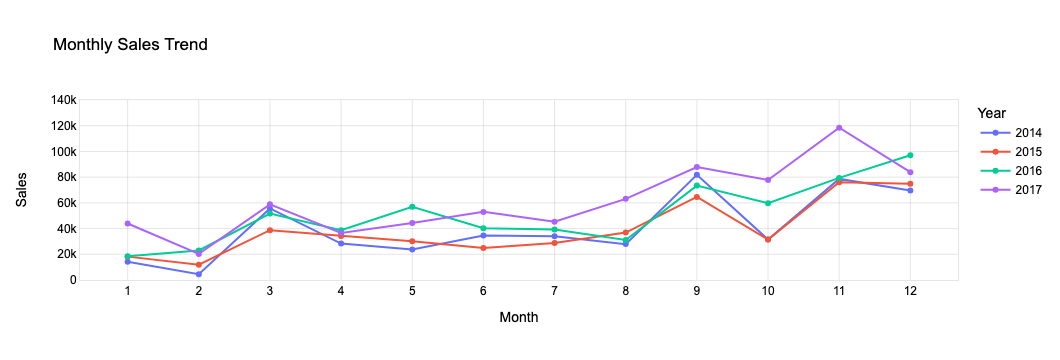

In [108]:
fig = px.line(monthly_sales, x='Order Month', y='Sales', color='Order Year',
              markers=True, title='Monthly Sales Trend',
              labels={'Order Month': 'Month', 'Sales': 'Sales', 'Order Year': 'Year'},
              range_y=[0, 140000])

fig.update_layout(
    xaxis=dict(type='category', gridcolor='rgba(0,0,0,0.1)', linecolor='rgba(0,0,0,0.1)', mirror=True),  
    yaxis=dict(tickmode='linear', tick0=0, dtick=20000, gridcolor='rgba(0,0,0,0.1)', linecolor='rgba(0,0,0,0.1)', mirror=True),  
    plot_bgcolor='rgba(0,0,0,0)',  
    paper_bgcolor='rgb(255,255,255)', 
    font=dict(family='Arial', size=12, color='rgb(0,0,0)')  
)

fig.show()

The line chart shows sales trends for different years, allowing for easy comparison.

The highest sales occur at the end of the year, especially in September and November, when customers may be buying more for the holidays. The lowest sales happen in February, after the holiday season is over and customers may have less disposable income. From March to August, sales are relatively stable and do not vary much.

### 3.2 Category and Subcategory Analysis

*Analyzing Sales, Profit, and Profit Margin performance by Category:*

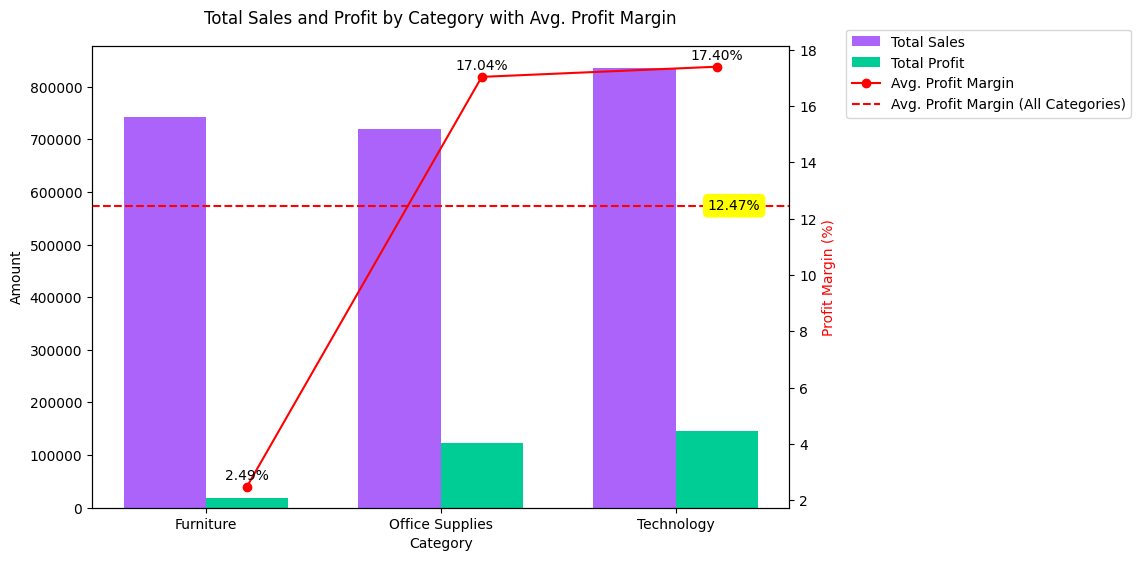

In [111]:
category_summary = superstore_data.groupby('Category').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

category_summary['Profit Margin'] = (category_summary['Profit'] / category_summary['Sales']) * 100

category_summary = category_summary.sort_values(by='Profit Margin', ascending=True)

fig, ax = plt.subplots(figsize=(9, 6))

bar_width = 0.35
bar_positions1 = range(len(category_summary))
bar_positions2 = [pos + bar_width for pos in bar_positions1]

ax.bar(bar_positions1, category_summary['Sales'], width=bar_width, label='Total Sales', color='#ab63fa')
ax.bar(bar_positions2, category_summary['Profit'], width=bar_width, label='Total Profit', color='#00cc96')

ax2 = ax.twinx()
line = ax2.plot(bar_positions2, category_summary['Profit Margin'], color='red', marker='o', label='Avg. Profit Margin')[0]

avg_margin_all_categories = (category_summary['Profit'].sum() / category_summary['Sales'].sum()) * 100
ax2.axhline(y=avg_margin_all_categories, color='red', linestyle='--', label='Avg. Profit Margin (All Categories)')

ax2.annotate(f'{avg_margin_all_categories:.2f}%', (0, avg_margin_all_categories),
             textcoords="offset points", xytext=(410, -3), ha='center', color='black',
             bbox=dict(facecolor='yellow', edgecolor='yellow', boxstyle='round,pad=0.3'))

ax.set_xticks([pos + bar_width / 2 for pos in bar_positions1])
ax.set_xticklabels(category_summary['Category'])
ax.set_xlabel('Category')
ax.set_ylabel('Amount')
ax2.set_ylabel('Profit Margin (%)', color='red') 
ax.set_title('Total Sales and Profit by Category with Avg. Profit Margin', y=1.03)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper right', bbox_to_anchor=(1.5, 1.05))

for i, txt in enumerate(category_summary['Profit Margin']):
    ax2.annotate(f'{txt:.2f}%', (bar_positions2[i], category_summary['Profit Margin'].iloc[i]),
                 textcoords="offset points", xytext=(0, 5), ha='center')

plt.show() 

Though Furniture, Office Supplies, and Technology categories have almost similar total sales, Furniture's average profit margin (2.49%) is significantly lower than Office Supplies' (17.04%) and Technology's (17.4%). This raises questions about which subcategories and products in each subcategory contribute mainly to the profit, as well as which ones make losses.

Therefore, next, the sales and profit margin data for each subcategory will be analyzed to identify the most and least profitable subcategories.

*Analyzing Sales and Profit Margins for all subcategories:*

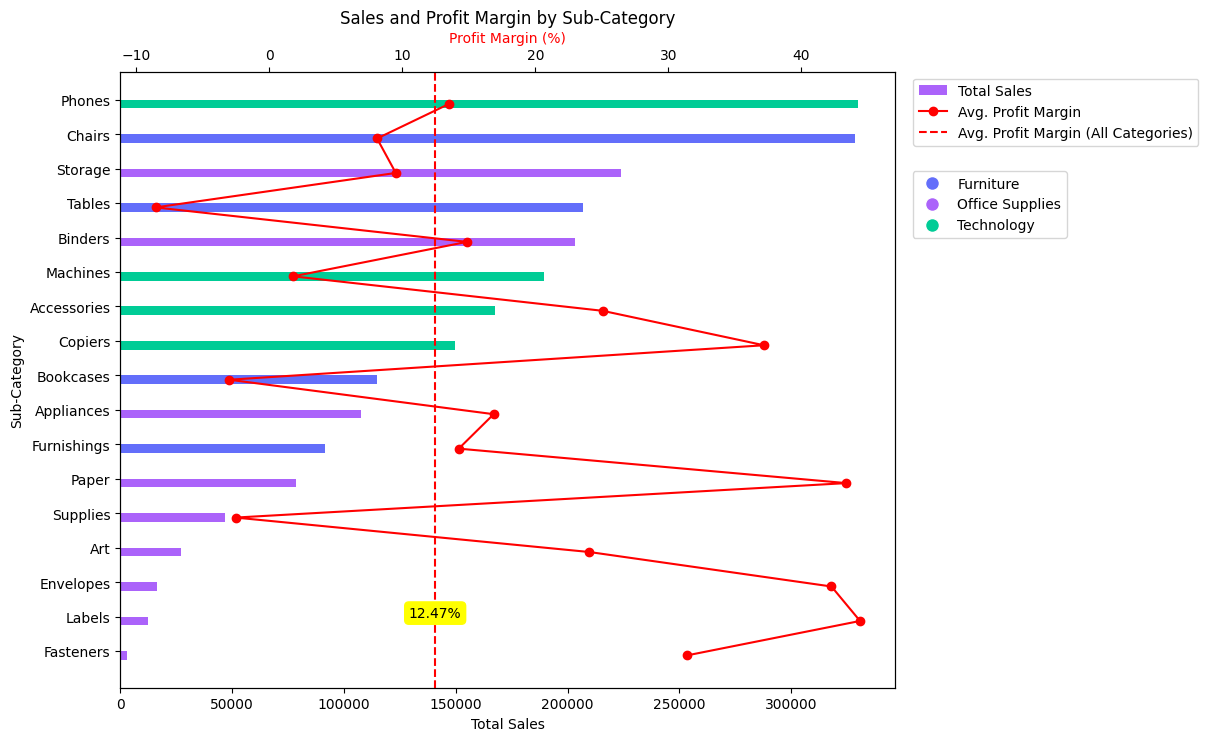

In [127]:
subcategory_summary = subcategory_summary.sort_values(by='Sales', ascending=True)

fig, ax = plt.subplots(figsize=(10, 8))

bar_width = 0.25
bar_positions1 = np.arange(len(subcategory_summary))
bar_positions2 = bar_positions1 + bar_width
bar_positions3 = bar_positions1 + bar_width * 1.3

legend_handles = []
legend_labels = []

for category, color in category_color_dict.items():
    patch = plt.Line2D([0], [0], marker='o', color='w', label=category, markerfacecolor=color, markersize=10)
    legend_handles.append(patch)
    legend_labels.append(category)

ax.barh(bar_positions1, subcategory_summary['Sales'], height=bar_width, label='Total Sales', color=subcategory_summary['Category'].map(category_color_dict))

ax2 = ax.twiny()
ax2.plot(subcategory_summary['Profit Margin'], bar_positions1, color='red', marker='o', label='Avg. Profit Margin')

avg_margin_all_categories = (subcategory_summary['Profit'].sum() / subcategory_summary['Sales'].sum()) * 100
ax2.axvline(x=avg_margin_all_categories, color='red', linestyle='--', label='Avg. Profit Margin (All Categories)')

ax2.annotate(f'{avg_margin_all_categories:.2f}%', (avg_margin_all_categories, -0.5),
             textcoords="offset points", xytext=(0, 40), ha='center', color='black',
             bbox=dict(facecolor='yellow', edgecolor='yellow', boxstyle='round,pad=0.3'))

ax.set_yticks(bar_positions1 + bar_width / 2)
ax.set_yticklabels(subcategory_summary['Sub-Category'])
ax.set_ylabel('Sub-Category')
ax.set_xlabel('Total Sales')
ax2.set_xlabel('Profit Margin (%)', color='red', y=20)

legend1 = ax.legend(handles=legend_handles, labels=legend_labels, loc='upper right', bbox_to_anchor=(1.23, 0.85))
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper right', bbox_to_anchor=(1.4, 1))

ax.add_artist(legend1)

ax.set_title('Sales and Profit Margin by Sub-Category')

plt.show()

*Analyzing Profit and Profit Margins for all subcategories:*

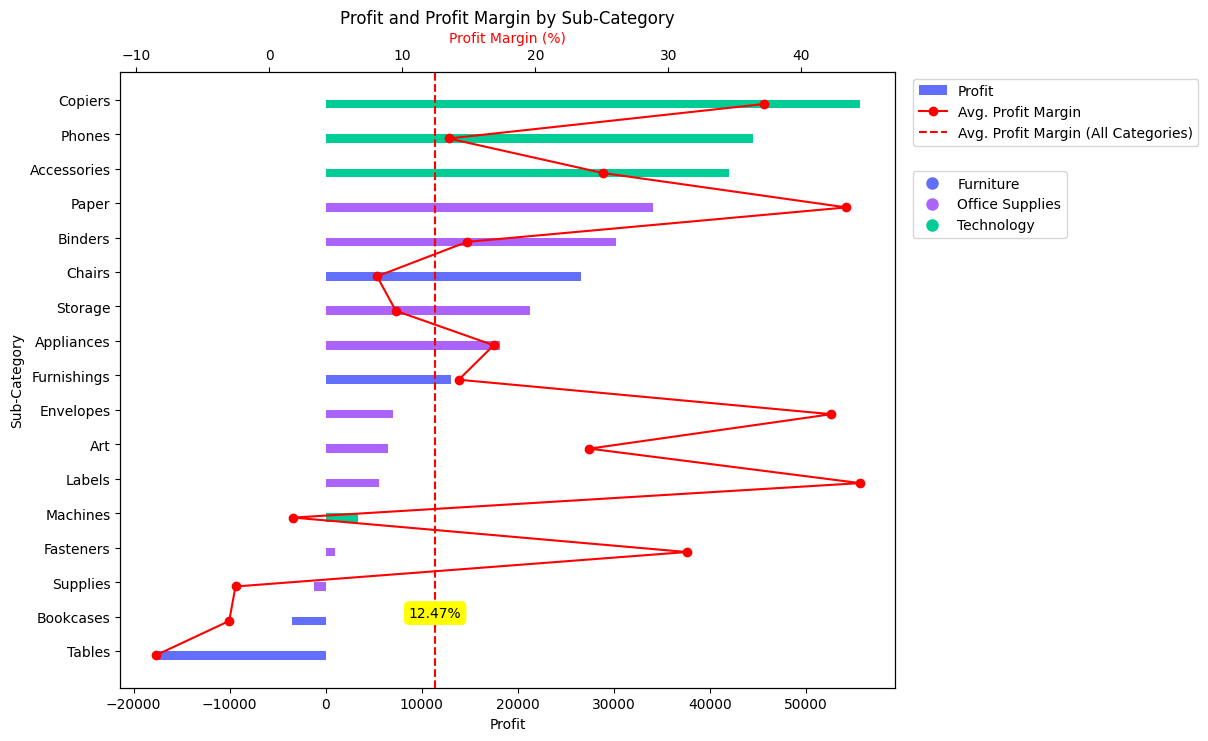

In [125]:
subcategory_summary = subcategory_summary.sort_values(by='Profit', ascending=True)

fig, ax = plt.subplots(figsize=(10, 8))

bar_width = 0.25
bar_positions1 = np.arange(len(subcategory_summary))
bar_positions2 = bar_positions1 + bar_width
bar_positions3 = bar_positions1 + bar_width * 1.3

legend_handles = []
legend_labels = []

for category, color in category_color_dict.items():
    patch = plt.Line2D([0], [0], marker='o', color='w', label=category, markerfacecolor=color, markersize=10)
    legend_handles.append(patch)
    legend_labels.append(category)

ax.barh(bar_positions1, subcategory_summary['Profit'], height=bar_width, label='Profit', color=subcategory_summary['Category'].map(category_color_dict))

ax2 = ax.twiny()
ax2.plot(subcategory_summary['Profit Margin'], bar_positions1, color='red', marker='o', label='Avg. Profit Margin')

avg_margin_all_categories = (subcategory_summary['Profit'].sum() / subcategory_summary['Sales'].sum()) * 100
ax2.axvline(x=avg_margin_all_categories, color='red', linestyle='--', label='Avg. Profit Margin (All Categories)')

ax2.annotate(f'{avg_margin_all_categories:.2f}%', (avg_margin_all_categories, -0.5),
             textcoords="offset points", xytext=(0, 40), ha='center', color='black',
             bbox=dict(facecolor='yellow', edgecolor='yellow', boxstyle='round,pad=0.3'))

ax.set_yticks(bar_positions1 + bar_width / 2)
ax.set_yticklabels(subcategory_summary['Sub-Category'])
ax.set_ylabel('Sub-Category')
ax.set_xlabel('Profit')
ax2.set_xlabel('Profit Margin (%)', color='red', y=20)

legend1 = ax.legend(handles=legend_handles, labels=legend_labels, loc='upper right', bbox_to_anchor=(1.23, 0.85))
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper right', bbox_to_anchor=(1.4, 1))

ax.add_artist(legend1)

ax.set_title('Profit and Profit Margin by Sub-Category')

plt.show()

The chart **Sales and Profit Margin by Sub-Category** indicates that within the Office Supplies category, subcategories such as Fasteners, Labels, Envelopes, Art Supplies, and Paper have the lowest sales. This makes sense because these items are usually cheaper. 

On the other hand, the highest sales come from the subcategories of Phones, Chairs, and Storage, which are more expensive. Most of the subcategories have positive profit margins, except for Suppliers (Office Supplies category), Bookcases (Furniture category), and Tables (Furniture category), which have negative profit margins.

The chart **Profit and Profit Margin by Sub-Category** shows that the subcategories with the highest profits are Copiers, Phones, and Accessories, which belong to the Technology category. These subcategories are highly profitable and have a strong market demand. 

On the other hand, the subcategories with the lowest and negative profits are Suppliers (Office Supplies category), Bookcases (Furniture category), and Tables (Furniture category). These subcategories are unprofitable and have a low market demand. This indicates that the company should either increase sales or reduce the expenses of these subcategories to enhance its profitability.

*Analyzing Sales, Profit, and Profit Margins for all Furniture subcategories:*

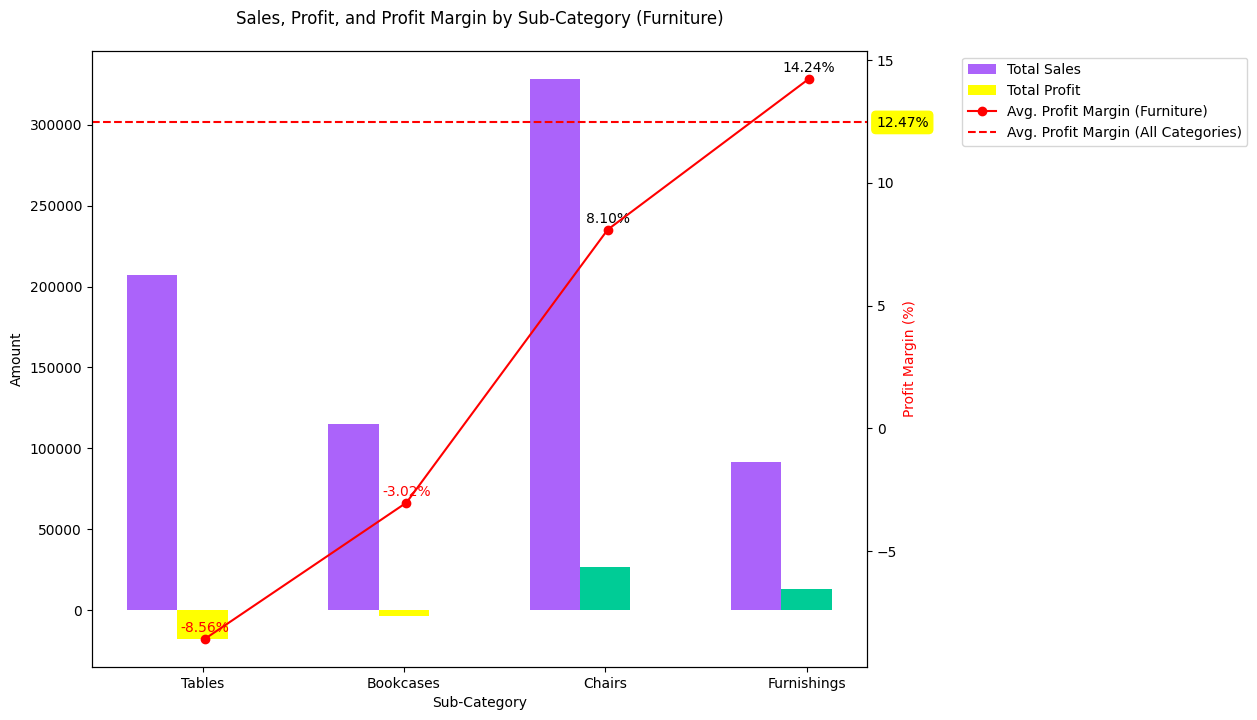

In [110]:
subcategory_summary = superstore_data.groupby(['Category', 'Sub-Category']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
}).reset_index()

subcategory_summary['Profit Margin'] = (subcategory_summary['Profit'] / subcategory_summary['Sales']) * 100

subcategory_summary = subcategory_summary.sort_values(by='Profit Margin', ascending=True)

furniture_data = subcategory_summary[subcategory_summary['Category'] == 'Furniture']

fig, ax = plt.subplots(figsize=(10, 8))

bar_width = 0.25
bar_positions1 = range(len(furniture_data))
bar_positions2 = [pos + bar_width for pos in bar_positions1]
bar_positions3 = [pos + bar_width * 1.3 for pos in bar_positions1]

total_profit_color = ['yellow' if profit < 0 else '#00cc96' for profit in furniture_data['Profit']]
ax.bar(bar_positions1, furniture_data['Sales'], width=bar_width, label='Total Sales', color='#ab63fa')
ax.bar(bar_positions2, furniture_data['Profit'], width=bar_width, label='Total Profit', color=total_profit_color)

ax2 = ax.twinx()
profit_margin_positions = [pos - bar_width / 4 for pos in bar_positions3]
profit_margin_values = furniture_data['Profit Margin']

for i, txt in enumerate(profit_margin_values):
    color = 'red' if txt < 0 else 'black'
    ax2.annotate(f'{txt:.2f}%', (profit_margin_positions[i], txt),
                 textcoords="offset points", xytext=(0, 5), ha='center', color=color)

ax2.plot(profit_margin_positions, profit_margin_values, color='red', marker='o', label='Avg. Profit Margin (Furniture)', zorder=10)

avg_margin_all_categories = (subcategory_summary['Profit'].sum() / subcategory_summary['Sales'].sum()) * 100
ax2.axhline(y=avg_margin_all_categories, color='red', linestyle='--', label='Avg. Profit Margin (All Categories)')

ax2.annotate(f'{avg_margin_all_categories:.2f}%', (0, avg_margin_all_categories),
             textcoords="offset points", xytext=(540, -3), ha='center', color='black',
             bbox=dict(facecolor='yellow', edgecolor='yellow', boxstyle='round,pad=0.3'))

ax.set_xticks([pos + bar_width for pos in bar_positions1])
ax.set_xticklabels(furniture_data['Sub-Category'])
ax.set_xlabel('Sub-Category')
ax.set_ylabel('Amount')
ax2.set_ylabel('Profit Margin (%)', color='red')
ax.set_title('Sales, Profit, and Profit Margin by Sub-Category (Furniture)', y=1.03)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper right', bbox_to_anchor=(1.5, 1))

plt.show()

The chart compares the sales, profit, and profit margins of various subcategories in the Furniture category. It reveals that the subcategories with the highest sales are Chairs and Tables, which together make up more than half of the total sales in this category. 

However, while the Chairs subcategory has a positive profit margin of 8.1%, the Tables subcategory has a negative profit margin of -8.56%. Also, the Bookcases subcategory holds a negative profit margin of -3.02. This suggests that the company should either increase the prices or reduce the costs of Tables and Bookcases to improve their profitability.

*Analyzing Sales, Profit, and Profit Margins for all Office Supplies subcategories:*

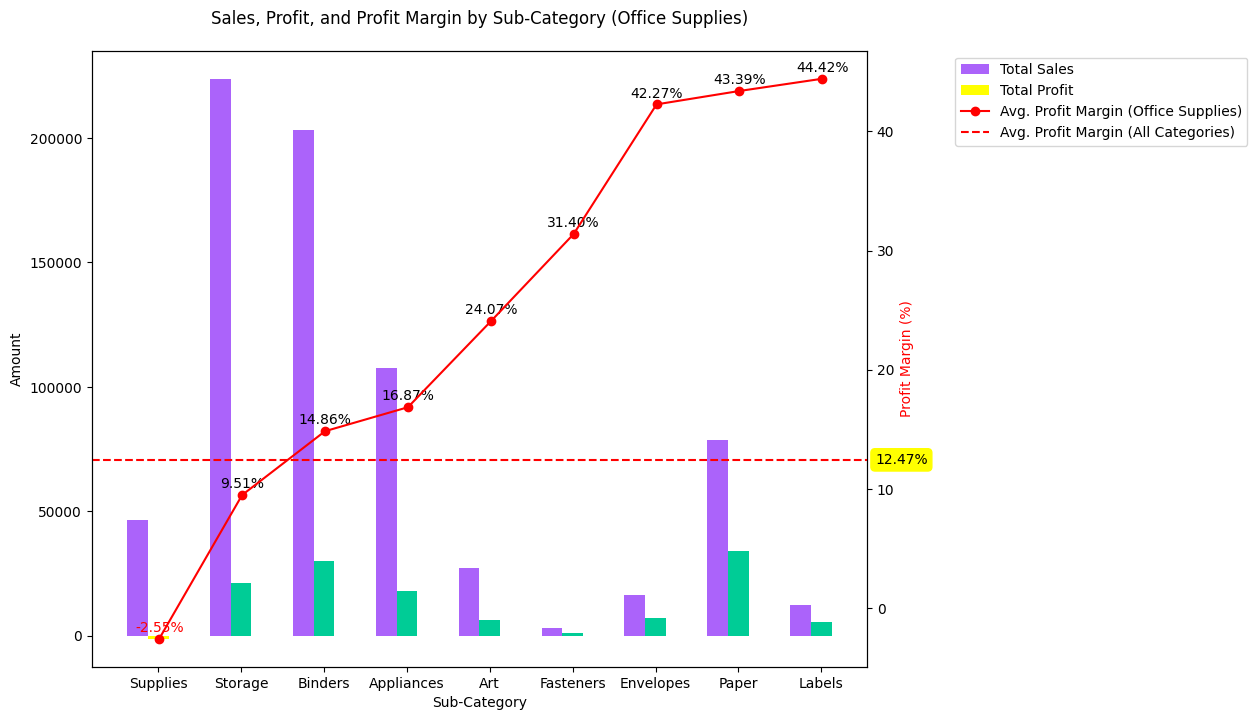

In [112]:
subcategory_summary = superstore_data.groupby(['Category', 'Sub-Category']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
}).reset_index()

subcategory_summary['Profit Margin'] = (subcategory_summary['Profit'] / subcategory_summary['Sales']) * 100

subcategory_summary = subcategory_summary.sort_values(by='Profit Margin', ascending=True)

officesupply_data = subcategory_summary[subcategory_summary['Category'] == 'Office Supplies']

fig, ax = plt.subplots(figsize=(10, 8))

bar_width = 0.25
bar_positions1 = range(len(officesupply_data))
bar_positions2 = [pos + bar_width for pos in bar_positions1]
bar_positions3 = [pos + bar_width * 1.3 for pos in bar_positions1]

total_profit_color = ['yellow' if profit < 0 else '#00cc96' for profit in officesupply_data['Profit']]
ax.bar(bar_positions1, officesupply_data['Sales'], width=bar_width, label='Total Sales', color='#ab63fa')
ax.bar(bar_positions2, officesupply_data['Profit'], width=bar_width, label='Total Profit', color=total_profit_color)

ax2 = ax.twinx()
profit_margin_positions = [pos - bar_width / 4 for pos in bar_positions3]
profit_margin_values = officesupply_data['Profit Margin']

for i, txt in enumerate(profit_margin_values):
    color = 'red' if txt < 0 else 'black'
    ax2.annotate(f'{txt:.2f}%', (profit_margin_positions[i], txt),
                 textcoords="offset points", xytext=(0, 5), ha='center', color=color)

ax2.plot(profit_margin_positions, profit_margin_values, color='red', marker='o', label='Avg. Profit Margin (Office Supplies)', zorder=10)

avg_margin_all_categories = (subcategory_summary['Profit'].sum() / subcategory_summary['Sales'].sum()) * 100
ax2.axhline(y=avg_margin_all_categories, color='red', linestyle='--', label='Avg. Profit Margin (All Categories)')

ax2.annotate(f'{avg_margin_all_categories:.2f}%', (0, avg_margin_all_categories),
             textcoords="offset points", xytext=(550, -3), ha='center', color='black',
             bbox=dict(facecolor='yellow', edgecolor='yellow', boxstyle='round,pad=0.3'))

ax.set_xticks([pos + bar_width for pos in bar_positions1])
ax.set_xticklabels(officesupply_data['Sub-Category'])
ax.set_xlabel('Sub-Category')
ax.set_ylabel('Amount')
ax2.set_ylabel('Profit Margin (%)', color='red')
ax.set_title('Sales, Profit, and Profit Margin by Sub-Category (Office Supplies)', y=1.03)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper right', bbox_to_anchor=(1.5, 1))

plt.show()

The chart compares the sales, profit, and profit margins of different subcategories in the Office Supplies category. It shows that the subcategories with the highest sales are Storage, Binders, and Appliances, which account for more than half of the total sales in this category. 

However, the subcategory with the highest profit and almost the highest profit margin is Paper. This indicates that the company earns more profit from selling Paper than from selling any other subcategory in the Office Supplies category. Therefore, the company should focus on maintaining or increasing the sales of the Paper subcategory to maximize its profitability.

*Analyzing Sales, Profit, and Profit Margins for all Technology subcategories:*

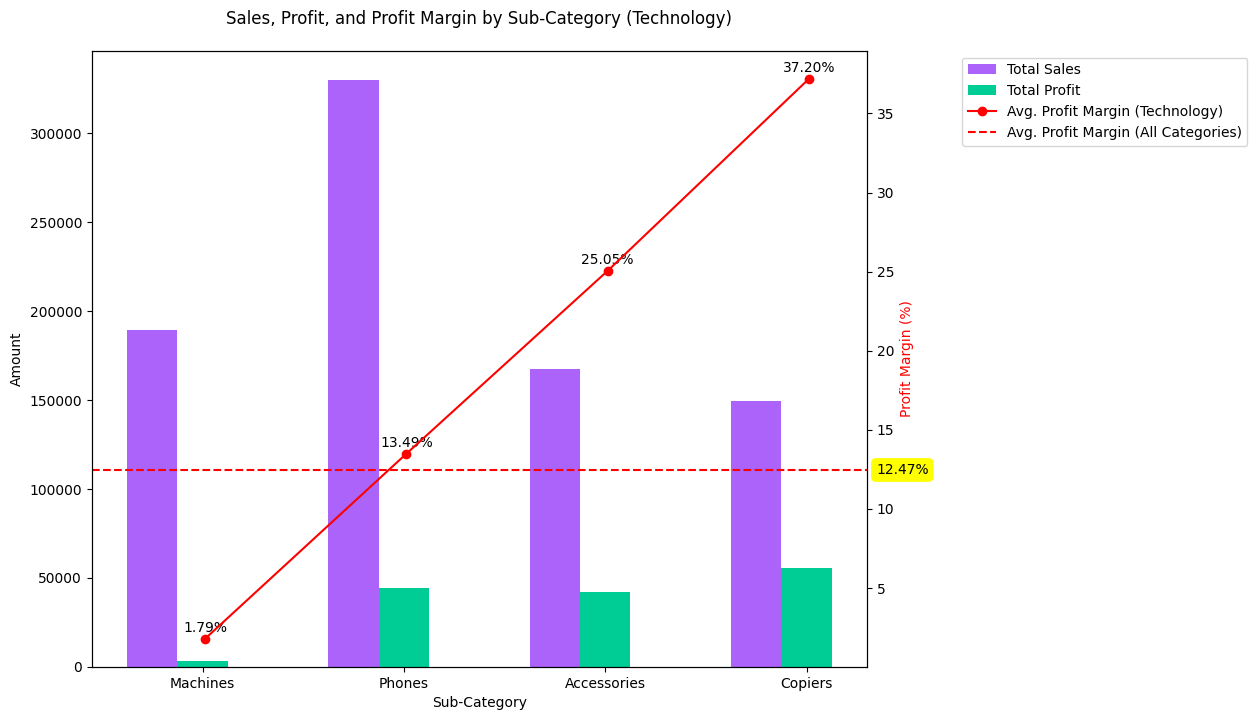

In [113]:
subcategory_summary = superstore_data.groupby(['Category', 'Sub-Category']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
}).reset_index()

subcategory_summary['Profit Margin'] = (subcategory_summary['Profit'] / subcategory_summary['Sales']) * 100

subcategory_summary = subcategory_summary.sort_values(by='Profit Margin', ascending=True)

technology_data = subcategory_summary[subcategory_summary['Category'] == 'Technology']

fig, ax = plt.subplots(figsize=(10, 8))

bar_width = 0.25
bar_positions1 = range(len(technology_data))
bar_positions2 = [pos + bar_width for pos in bar_positions1]
bar_positions3 = [pos + bar_width * 1.3 for pos in bar_positions1]

total_profit_color = ['yellow' if profit < 0 else '#00cc96' for profit in technology_data['Profit']]
ax.bar(bar_positions1, technology_data['Sales'], width=bar_width, label='Total Sales', color='#ab63fa')
ax.bar(bar_positions2, technology_data['Profit'], width=bar_width, label='Total Profit', color=total_profit_color)

ax2 = ax.twinx()
profit_margin_positions = [pos - bar_width / 4 for pos in bar_positions3]
profit_margin_values = technology_data['Profit Margin']

for i, txt in enumerate(profit_margin_values):
    color = 'red' if txt < 0 else 'black'
    ax2.annotate(f'{txt:.2f}%', (profit_margin_positions[i], txt),
                 textcoords="offset points", xytext=(0, 5), ha='center', color=color)

ax2.plot(profit_margin_positions, profit_margin_values, color='red', marker='o', label='Avg. Profit Margin (Technology)', zorder=10)

avg_margin_all_categories = (subcategory_summary['Profit'].sum() / subcategory_summary['Sales'].sum()) * 100
ax2.axhline(y=avg_margin_all_categories, color='red', linestyle='--', label='Avg. Profit Margin (All Categories)')

ax2.annotate(f'{avg_margin_all_categories:.2f}%', (0, avg_margin_all_categories),
             textcoords="offset points", xytext=(540, -3), ha='center', color='black',
             bbox=dict(facecolor='yellow', edgecolor='yellow', boxstyle='round,pad=0.3'))

ax.set_xticks([pos + bar_width for pos in bar_positions1])
ax.set_xticklabels(technology_data['Sub-Category'])
ax.set_xlabel('Sub-Category')
ax.set_ylabel('Amount')
ax2.set_ylabel('Profit Margin (%)', color='red')
ax.set_title('Sales, Profit, and Profit Margin by Sub-Category (Technology)', y=1.03)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper right', bbox_to_anchor=(1.5, 1))

plt.show()

The chart compares the sales, profit, and profit margins of various subcategories in the Technology category. It shows that the subcategories with the highest sales are Phones and Machines, which together make up more than half of the total sales in this category. 

However, the Machines subcategory has the lowest profit margin of only 1.79%. This subcategory might have a high cost of production and a low market share. Notably, the Copiers subcategory has the lowest sales compared to other subcategories in the Technology category but has the highest profit margin of 37.2%. This suggests that the company should increase the sales of Copiers and reduce the costs of Machines to improve their profitability. Alternatively, the company could also consider increasing the prices of Machines or lowering the prices of Copiers to attract more customers.

In the following section, we will evaluate the performance of each product.

### 3.3 Product Performance Analysis

*Identifying the Top-performing Products by Sales*

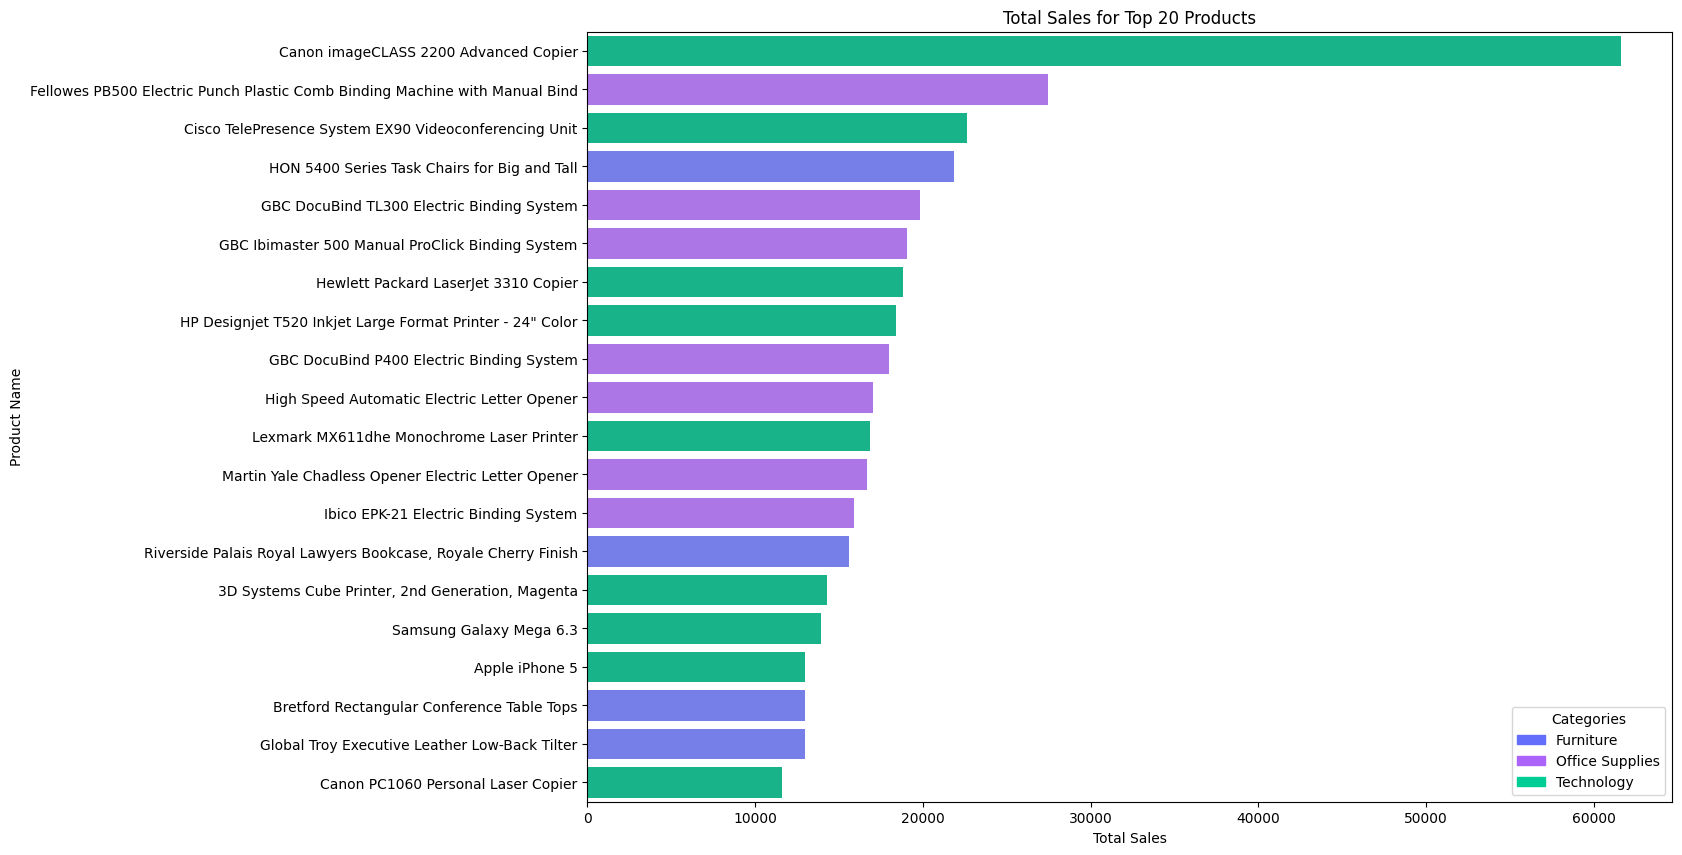

In [201]:
category_color_dict = {'Furniture': '#636efa', 'Office Supplies': '#ab63fa', 'Technology': '#00cc96'}

products = superstore_data.groupby('Product Name').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Category': 'first'  
}).reset_index()

top_products = products.nlargest(20, 'Sales')  
top_products = top_products.sort_values('Sales', ascending=False)

figure, ax = plt.subplots(figsize=(14, 10))

colors = top_products['Category'].map(category_color_dict)

g = sns.barplot(x='Sales', y='Product Name', data=top_products, hue='Category', dodge=False, ax=ax, palette=category_color_dict)
g.set_title('Total Sales for Top 20 Products')
g.set_xlabel('Total Sales')

handles = [plt.Rectangle((0,0),1,1, color=category_color_dict[cat]) for cat in category_color_dict]
ax.legend(handles, category_color_dict.keys(), title='Categories')

plt.show()

*Identifying the Top-performing Products by Profit:*

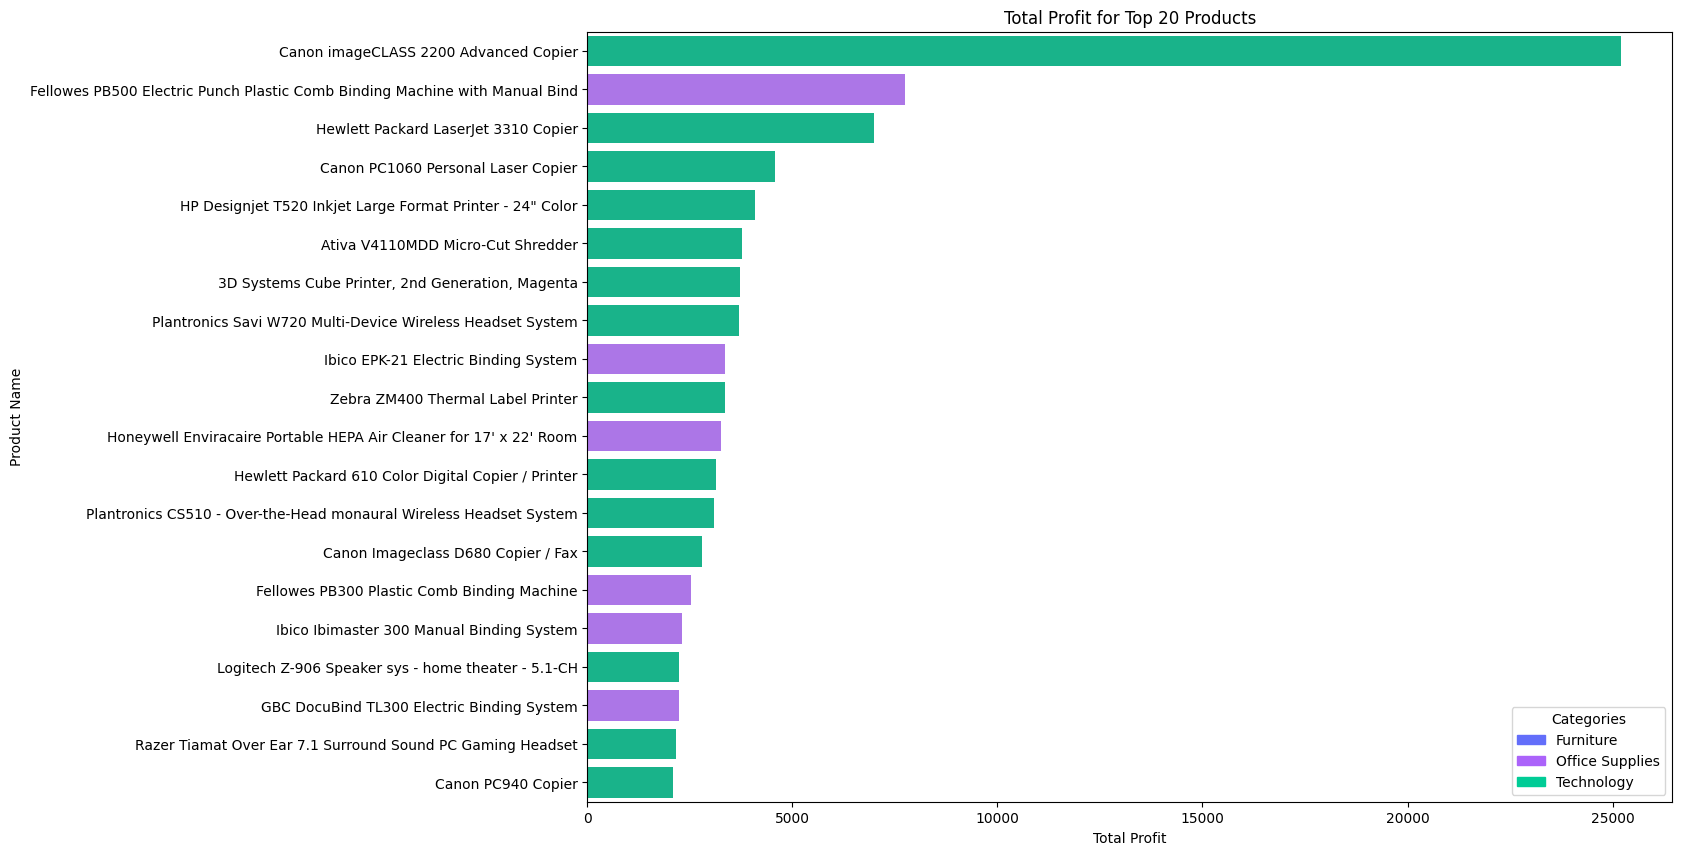

In [196]:
top_products = products.nlargest(20, 'Profit')  
top_products = top_products.sort_values('Profit', ascending=False)

figure, ax = plt.subplots(figsize=(14, 10))

colors = top_products['Category'].map(category_color_dict)

g = sns.barplot(x='Profit', y='Product Name', data=top_products, hue='Category', dodge=False, ax=ax, palette=category_color_dict)
g.set_title('Total Profit for Top 20 Products')
g.set_xlabel('Total Profit')

handles = [plt.Rectangle((0,0),1,1, color=category_color_dict[cat]) for cat in category_color_dict]
ax.legend(handles, category_color_dict.keys(), title='Categories')

plt.show()

The Technology category dominates both sales and profit among the top 20 products. The Canon imageCLASS 2200 Advanced Copier is the best performer in this category and overall. 

The Office Supplies category also has a good share of the highest sales, but not as much as Technology in profits. 

The Furniture category is the least represented in both metrics, with no contribution to the top 20 profits.

*Identifying the Bottom-performing Products by Sales:*

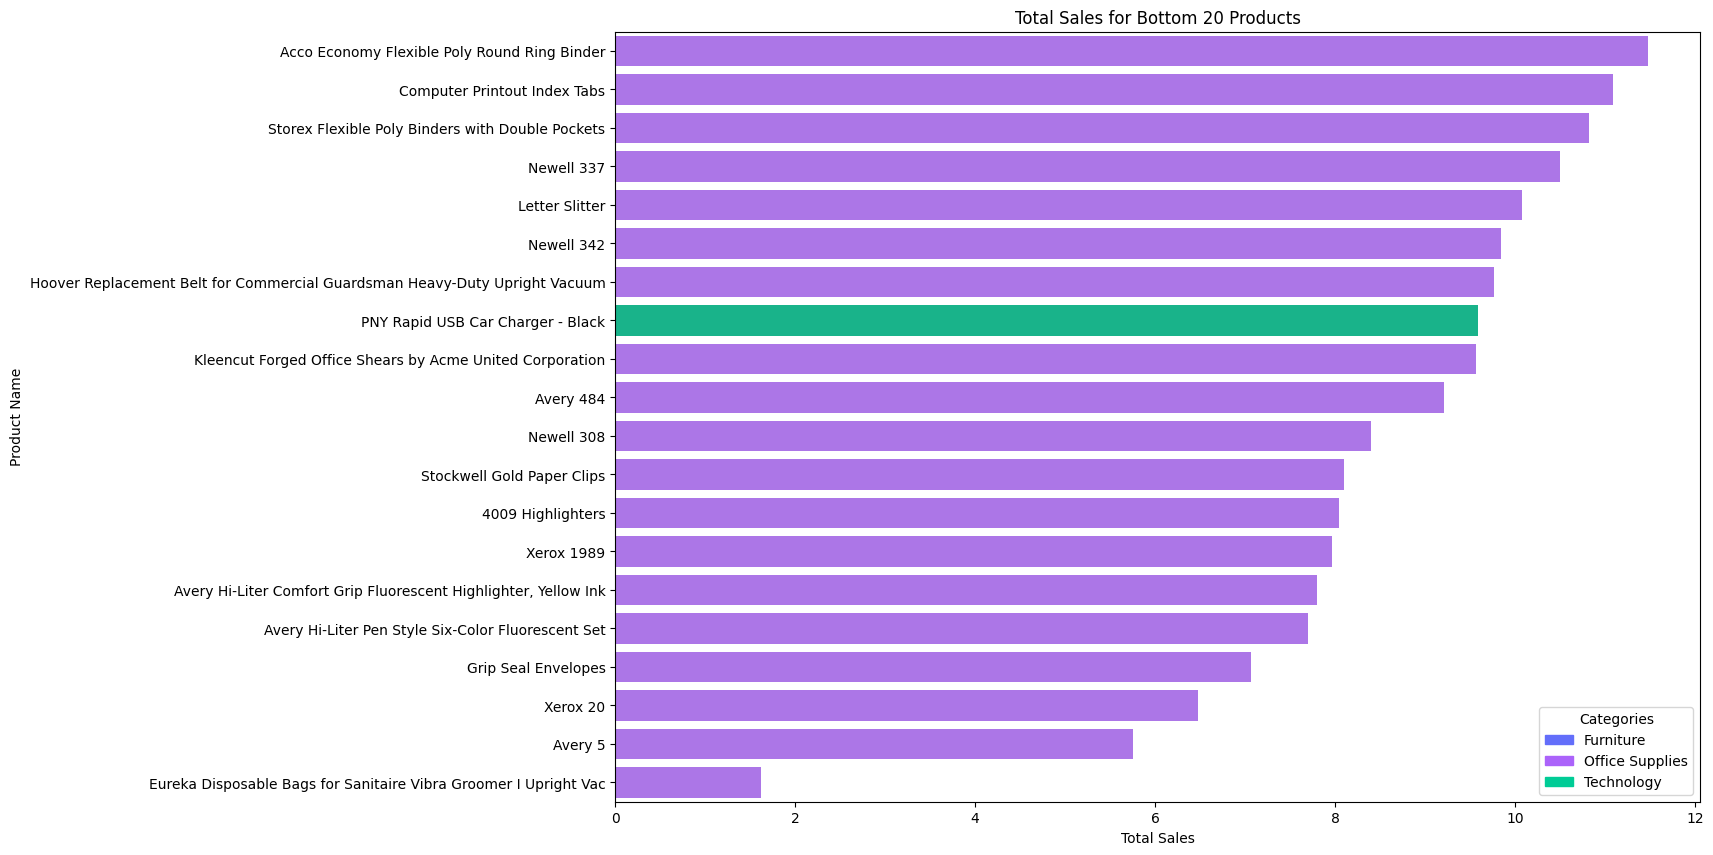

In [202]:
bottom_products = products.nsmallest(20, 'Sales')  
bottom_products = bottom_products.sort_values('Sales', ascending=False)

figure, ax = plt.subplots(figsize=(14, 10))

colors = bottom_products['Category'].map(category_color_dict)

g = sns.barplot(x='Sales', y='Product Name', data=bottom_products, hue='Category', dodge=False, ax=ax, palette=category_color_dict)
g.set_title('Total Sales for Bottom 20 Products')
g.set_xlabel('Total Sales')

handles = [plt.Rectangle((0,0),1,1, color=category_color_dict[cat]) for cat in category_color_dict]
ax.legend(handles, category_color_dict.keys(), title='Categories')

plt.show()

*Identifying the Bottom-performing Products by Profit:*

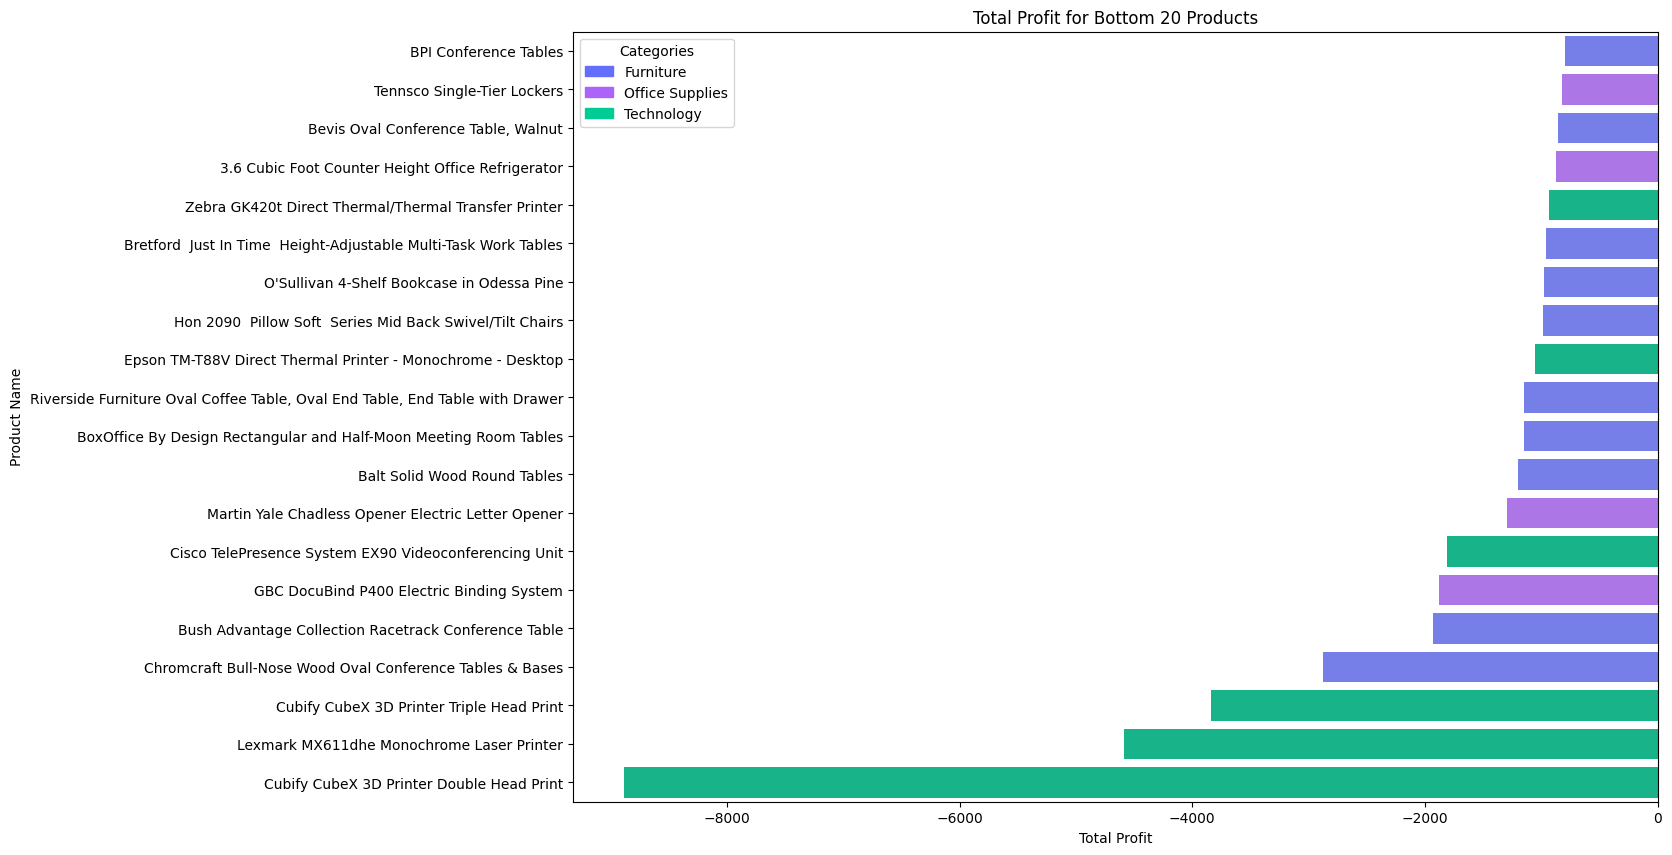

In [203]:
products['Product Name'] = products['Product Name'].apply(lambda x: ''.join([i if ord(i) < 128 else ' ' for i in x]))

bottom_products = products.nsmallest(20, 'Profit')  
bottom_products = bottom_products.sort_values('Profit', ascending=False)

figure, ax = plt.subplots(figsize=(14, 10))

colors = bottom_products['Category'].map(category_color_dict)

g = sns.barplot(x='Profit', y='Product Name', data=bottom_products, hue='Category', dodge=False, ax=ax, palette=category_color_dict)
g.set_title('Total Profit for Bottom 20 Products')
g.set_xlabel('Total Profit')

handles = [plt.Rectangle((0,0),1,1, color=category_color_dict[cat]) for cat in category_color_dict]
ax.legend(handles, category_color_dict.keys(), title='Categories')

plt.show()

The Office Supplies category fills the list of 20 products with the lowest sales, with only one product (PNY Rapid USB Car Charger - Black) from the Technology category.

All the least profitable products have losses, with the worst three products from the Technology category. The Furniture category and the Technology category have the most products in the bottom 20.

### 3.4 Customer Segmentation Analysis

*Identifying Sales and Profit contribution by Customer Segment:*

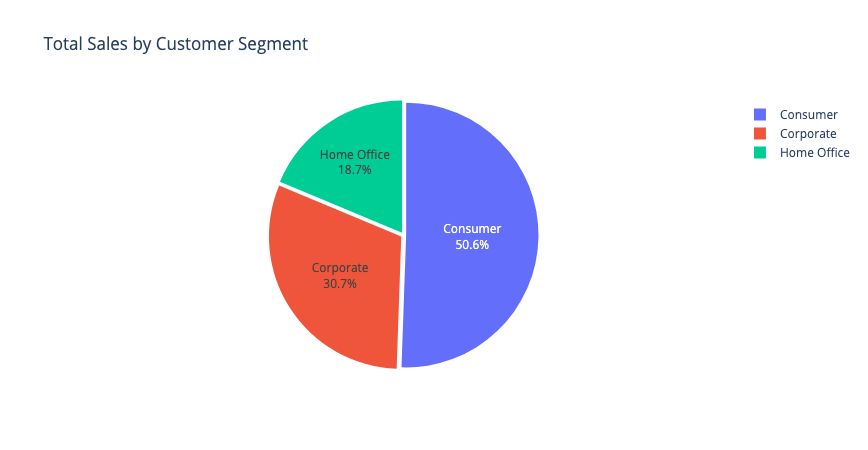

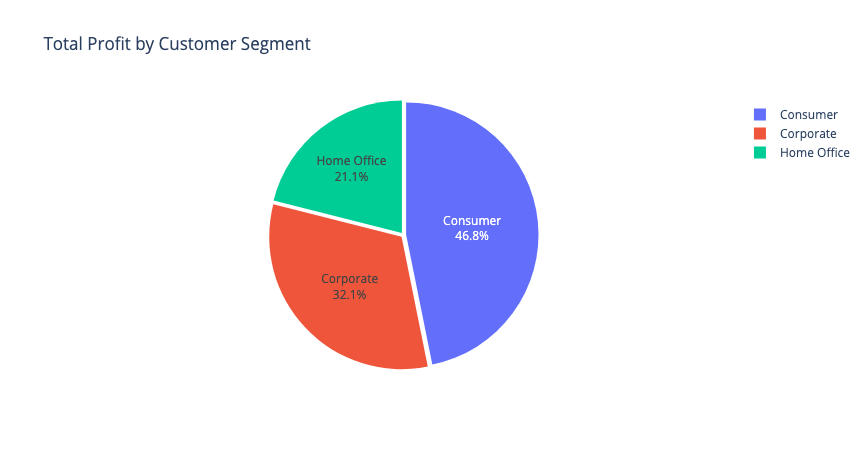

In [358]:
sales_by_segment = superstore_data.groupby('Segment')['Sales'].sum().reset_index()
sales_by_segment = sales_by_segment.sort_values(by='Sales', ascending=False)

fig_sales = px.pie(sales_by_segment, names='Segment', values='Sales',
                   title='Total Sales by Customer Segment',
                   labels={'Sales': 'Amount'},
                   category_orders={'Segment': sales_by_segment['Segment'].tolist()})

fig_sales.update_traces(textinfo='percent+label', pull=[0.02, 0.02, 0.02], textposition='inside', hoverinfo='label+percent+value')
fig_sales.update_layout(height=450, width=700)
fig_sales.show()

profit_by_segment = superstore_data.groupby('Segment')['Profit'].sum().reset_index()
profit_by_segment = profit_by_segment.sort_values(by='Profit', ascending=False)

fig_profit = px.pie(profit_by_segment, names='Segment', values='Profit',
                    title='Total Profit by Customer Segment',
                    labels={'Profit': 'Amount'},
                    category_orders={'Segment': profit_by_segment['Segment'].tolist()})

fig_profit.update_traces(textinfo='percent+label', pull=[0.02, 0.02, 0.02], textposition='inside', hoverinfo='label+percent+value')
fig_profit.update_layout(height=450, width=700)
fig_profit.show()

The charts show that the Consumer segment accounts for nearly half of both total sales and total profit. The Corporate segment is the second-largest contributor, followed by the Home Office segment.

*Analyzing Sales and Profit by Customer Segment and Product Category:*

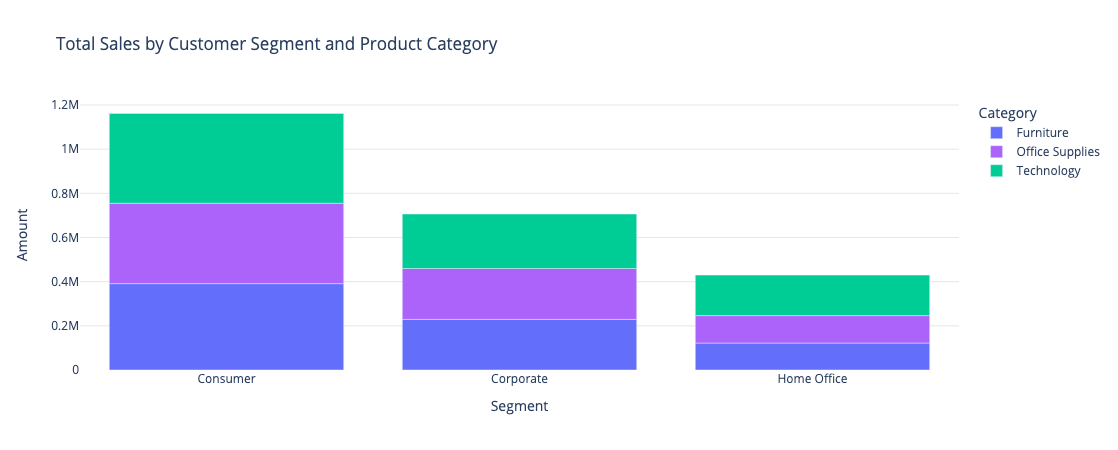

In [355]:
warnings.simplefilter(action='ignore', category=FutureWarning)

sales_segment_category = superstore_data.groupby(['Segment', 'Category'])['Sales'].sum().reset_index()

category_color_dict = {
    'Furniture': '#00cc96',
    'Office Supplies': '#636efa',
    'Technology': '#ab63fa'
}

fig_sales_segment_category = px.bar(sales_segment_category, x='Segment', y='Sales', color='Category',
                                     title='Total Sales by Customer Segment and Product Category',
                                     labels={'Sales': 'Amount'},
                                     category_orders={'Segment': sales_segment_category['Segment'].unique().tolist()},
                                     color_discrete_map={'Category': category_color_dict},
                                     color_discrete_sequence=[category_color_dict[cat] for cat in sales_segment_category['Category']])

fig_sales_segment_category.update_layout(height=450, width=700,
                                         plot_bgcolor='rgb(255,255,255,255)', 
                                         xaxis=dict(gridcolor='rgb(255,255,255,255)'),
                                         yaxis=dict(gridcolor='rgba(0,0,0,0.1)'))  

fig_sales_segment_category.show()

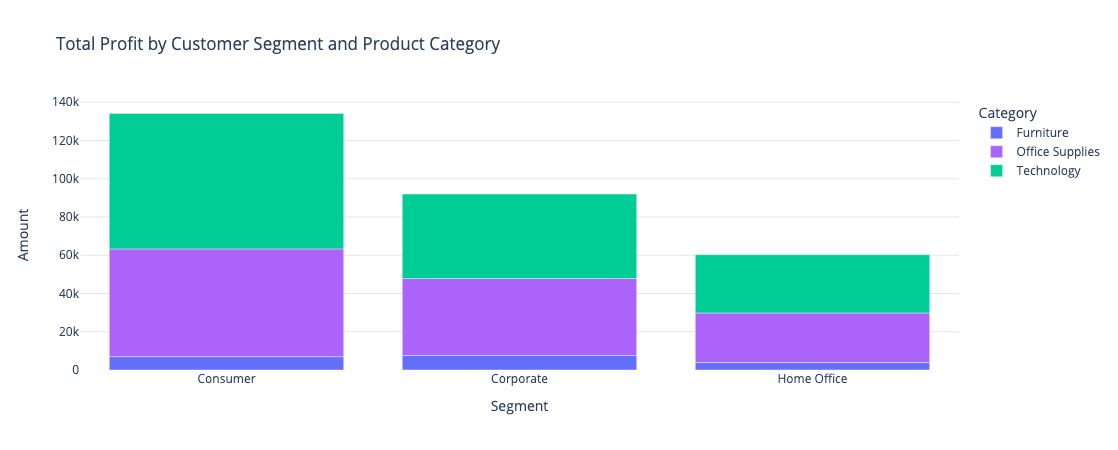

In [357]:
warnings.simplefilter(action='ignore', category=FutureWarning)

profit_segment_category = superstore_data.groupby(['Segment', 'Category'])['Profit'].sum().reset_index()

category_color_dict = {
    'Furniture': '#00cc96',
    'Office Supplies': '#636efa',
    'Technology': '#ab63fa'
}

fig_profit_segment_category = px.bar(profit_segment_category, x='Segment', y='Profit', color='Category',
                                     title='Total Profit by Customer Segment and Product Category',
                                     labels={'Profit': 'Amount'},
                                     category_orders={'Segment': profit_segment_category['Segment'].unique().tolist()},
                                     color_discrete_map={'Category': category_color_dict},
                                     color_discrete_sequence=[category_color_dict[cat] for cat in profit_segment_category['Category']])

fig_profit_segment_category.update_layout(height=450, width=700,
                                         plot_bgcolor='rgb(255,255,255,255)', 
                                         xaxis=dict(gridcolor='rgb(255,255,255,255)'),
                                         yaxis=dict(gridcolor='rgba(0,0,0,0.1)')) 

fig_profit_segment_category.show()

The total sales for the three categories are similar. However, in terms of total profit, the Furniture category is the least profitable with a negligible amount compared to the Technology and Office Supplies categories.

As expected, Technology leads in both sales and profit.

### 3.5 Geographic Analysis

*Analyzing Sales and Profit by Region:*

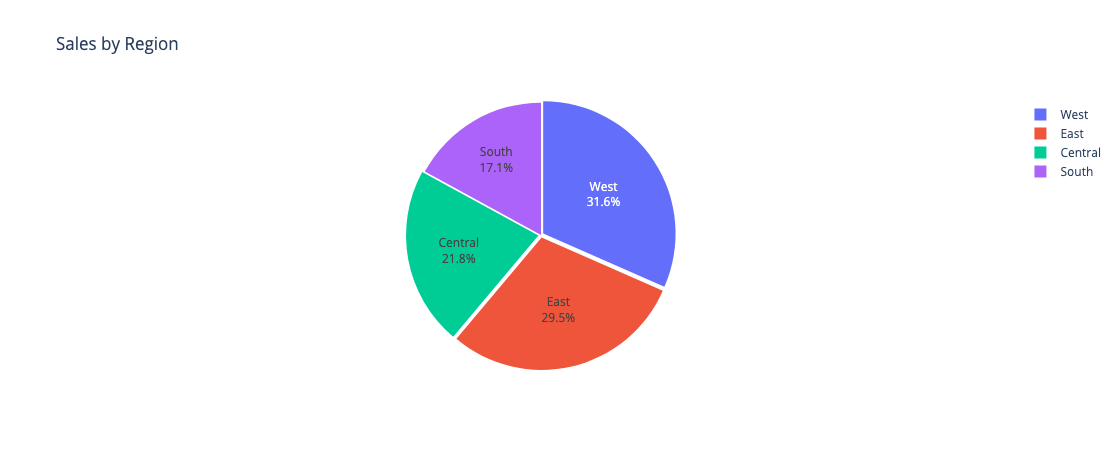

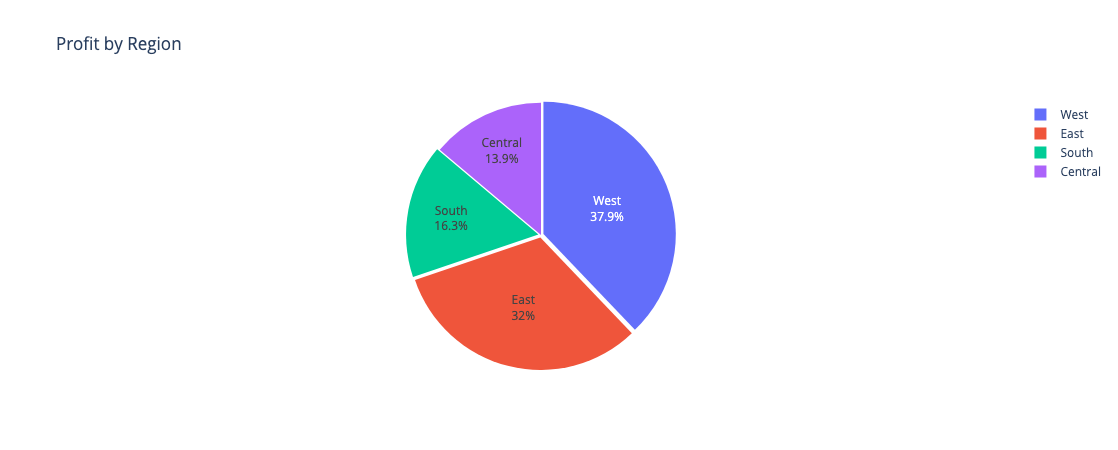

In [311]:
sales_profit_by_region = superstore_data.groupby('Region')[['Sales', 'Profit']].sum().reset_index()

sales_profit_by_region = sales_profit_by_region.sort_values(by=['Sales'], ascending=False)

fig_sales = px.pie(sales_profit_by_region, names='Region', values='Sales',
                   title='Sales by Region',
                   labels={'Sales': 'Amount'},
                   category_orders={'Region': sales_profit_by_region['Region'].tolist()})

sales_profit_by_region = sales_profit_by_region.sort_values(by=['Profit'], ascending=False)

fig_profit = px.pie(sales_profit_by_region, names='Region', values='Profit',
                    title='Profit by Region',
                    labels={'Profit': 'Amount'},
                    category_orders={'Region': sales_profit_by_region['Region'].tolist()})

fig_sales.update_traces(textinfo='percent+label', pull=[0.02, 0.02, 0.02], textposition='inside', hoverinfo='label+percent+value')
fig_profit.update_traces(textinfo='percent+label', pull=[0.02, 0.02, 0.02], textposition='inside', hoverinfo='label+percent+value')

fig_sales.update_layout(height=450, width=700)
fig_profit.update_layout(height=450, width=700)

fig_sales.show()
fig_profit.show()

The West region leads the other regions in both sales and profit, with 31.6% of Total Sales and 36.9% of Total Profit.

*Creating the choropleth map showing the Total Sales for each State in the United States:*

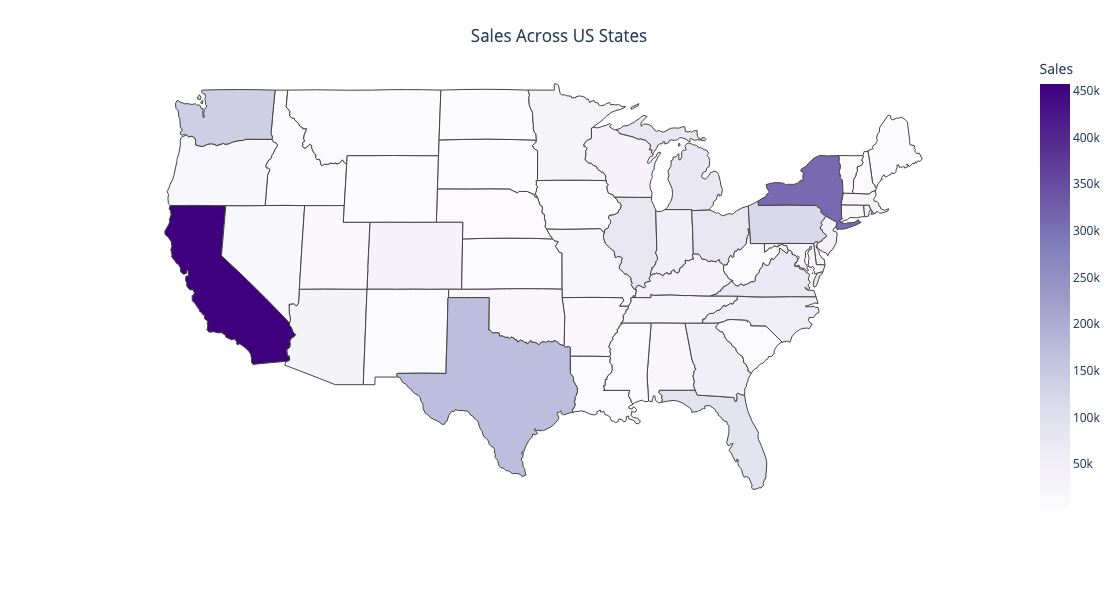

In [308]:
state_sales = superstore_data.groupby('State')['Sales'].sum().reset_index()

us_states = gpd.read_file('/Users/uyentran/Desktop/Superstore/Data/us-states.json')

fig = px.choropleth(
    state_sales,
    geojson=us_states,
    color='Sales',
    locations='State',
    featureidkey='properties.name',
    projection='natural earth', 
    color_continuous_scale='purples',
    title='Sales Across US States'
)

fig.update_geos(fitbounds="locations", visible=False, projection_scale=5)
fig.update_layout(width=1000, height=600, title_x=0.5, title_y=0.95, margin=dict(t=50)) 

fig.show()

The darker the color, the higher the sales. As you can see, California, New York, and Texas have the highest sales.
The chart uses color intensity to indicate the sales levels of different states in the US. It shows that California, New York, and Texas have the highest sales, as they are shaded with the darkest colors. These states have a large population and a high economic activity. They also have a high demand for various products in the Technology, Furniture, and Office Supplies categories. 

The chart also reveals that some states have low sales, as they are shaded with light colors. This suggests that the company should focus on expanding its market share and increasing its sales in these states. Alternatively, the company could also consider offering discounts or promotions to attract more customers in these states.

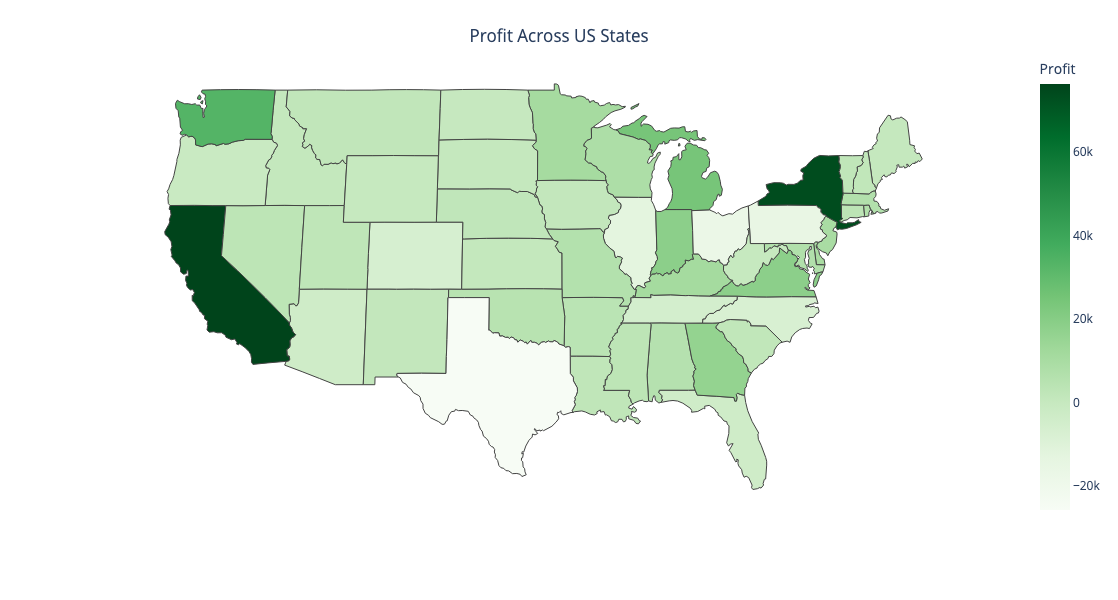

In [316]:
state_sales = superstore_data.groupby('State')['Profit'].sum().reset_index()

us_states = gpd.read_file('/Users/uyentran/Desktop/Superstore/Data/us-states.json')

fig = px.choropleth(
    state_sales,
    geojson=us_states,
    color='Profit',
    locations='State',
    featureidkey='properties.name',
    projection='natural earth', 
    color_continuous_scale='greens',
    title='Profit Across US States'
)

fig.update_geos(fitbounds="locations", visible=False, projection_scale=5)
fig.update_layout(width=1000, height=600, title_x=0.5, title_y=0.95, margin=dict(t=50)) 

fig.show()

The chart uses color intensity to indicate the profit levels of different states in the US. It shows that California, New York, and Washington have the highest profits, as they are shaded with the darkest colors. These states have a large market demand and a high sales volume. 

Texas, on the other hand, is ranked as the third highest in total sales, but its profit is among the lowest, as it is shaded with a light color. This means that Texas has a low profit margin and a high cost of production. This suggests that the company should either increase the prices or reduce the expenses of its products in Texas to improve its profitability.

*Identifying Sales and Profit by State:*

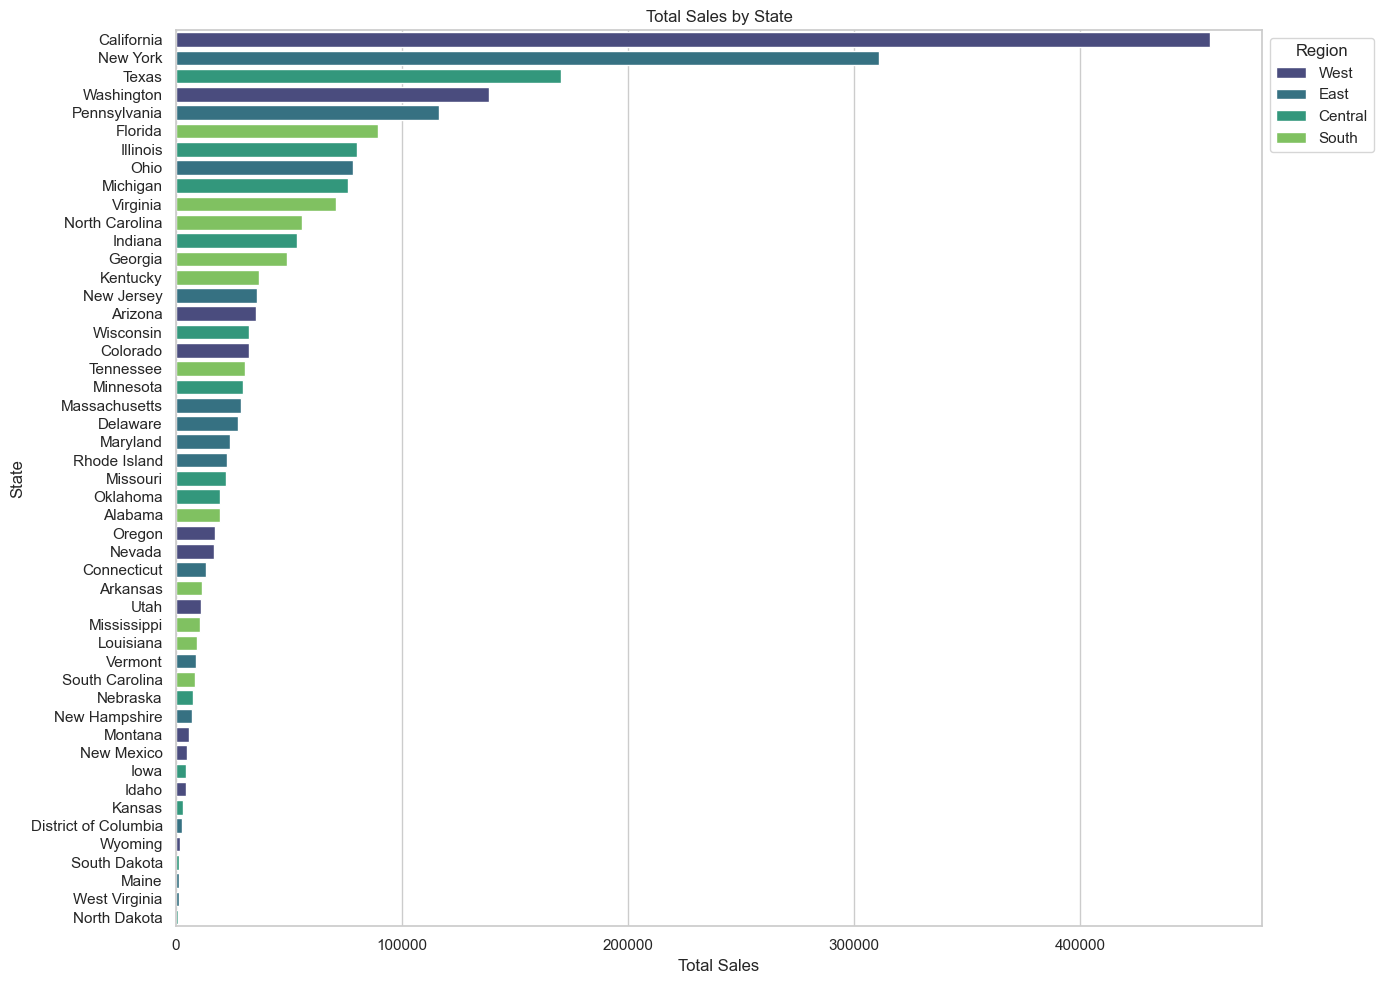

In [312]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Region' is a column in your superstore_data DataFrame
total_sales_by_state = superstore_data.groupby(['State', 'Region'])['Sales'].sum().reset_index()

total_sales_by_state = total_sales_by_state.sort_values(by='Sales', ascending=False)

plt.figure(figsize=(14, 10))
sns.barplot(x='Sales', y='State', data=total_sales_by_state, palette='viridis', hue='Region')
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.title('Total Sales by State')

# Adding legend
plt.legend(title='Region', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()


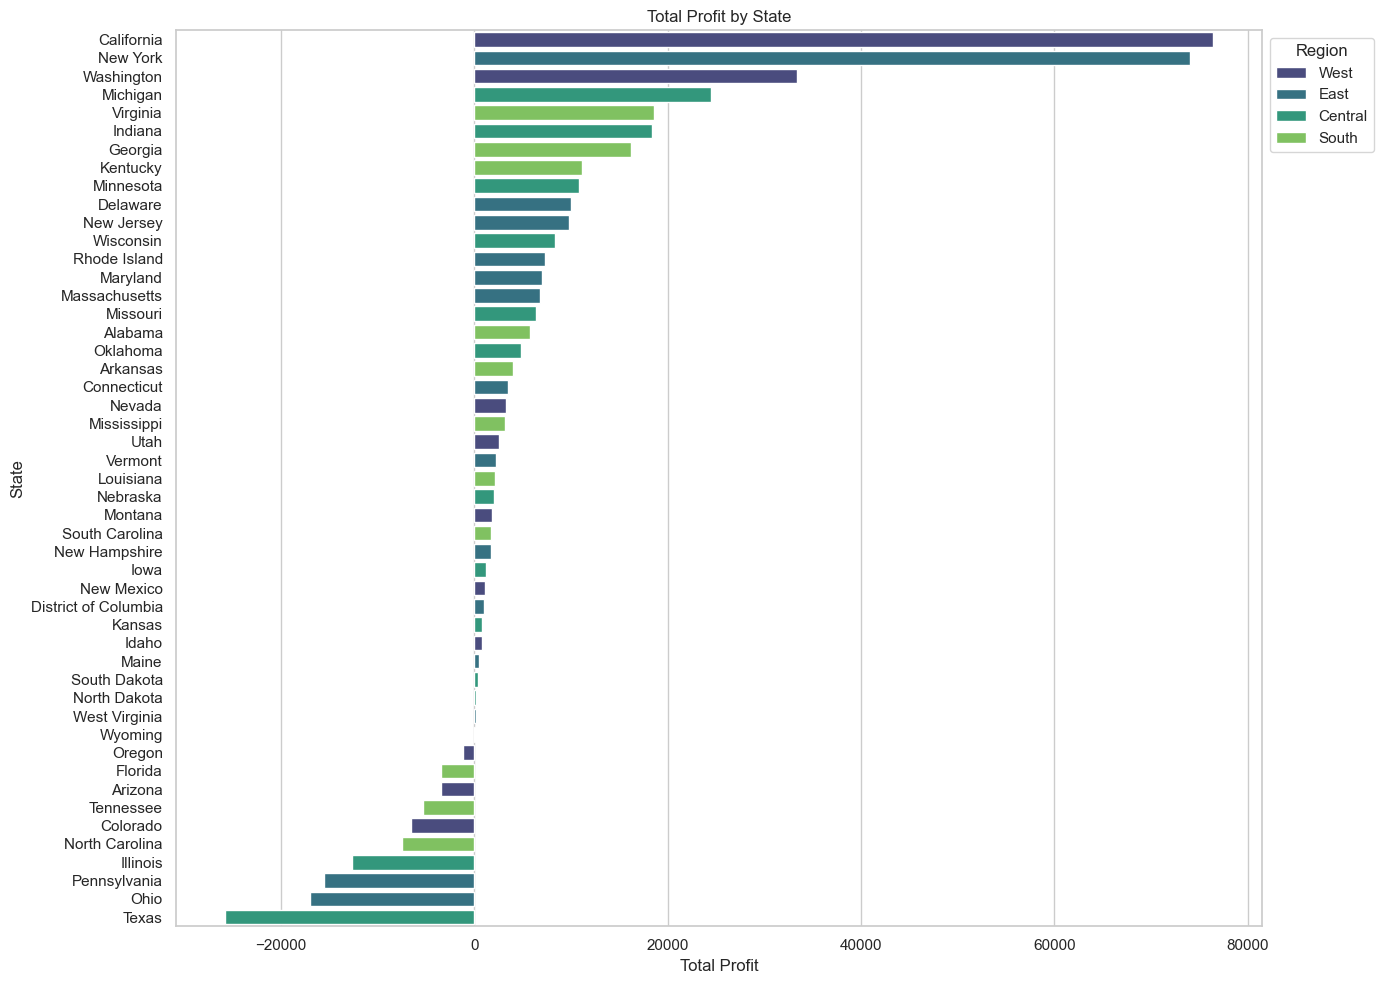

In [315]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Region' is a column in your superstore_data DataFrame
total_profit_by_state = superstore_data.groupby(['State', 'Region'])['Profit'].sum().reset_index()

total_profit_by_state = total_profit_by_state.sort_values(by='Profit', ascending=False)

plt.figure(figsize=(14, 10))
sns.barplot(x='Profit', y='State', data=total_profit_by_state, palette='viridis', hue='Region')
plt.xlabel('Total Profit')
plt.ylabel('State')
plt.title('Total Profit by State')

# Adding legend
plt.legend(title='Region', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()


Despite having the highest percentages of both sales and profit, the West region only accounts for two of the top 20 states in terms of sales and profit.